In [268]:
import scanpy as sc
import omicverse as ov
import numpy as np
import pandas as pd

In [269]:
rawdata_path = '/storage/zengjianyangLab/hulei/GBM/Raw_Data/14samples/'

adata_raw = sc.read_h5ad(os.path.join(rawdata_path,filename.split('.')[0].split('_')[0]+'.h5'))
adata_raw.obs_names = [x+'_'+filename.split('.')[0].split('_')[0] for x in adata_raw.obs_names]
adata_raw

AnnData object with n_obs × n_vars = 32052 × 28925
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'x', 'y', 'nCount_SCT', 'nFeature_SCT', 'first_type', 'B.cells', 'Endothelial', 'Macrophages', 'Microglial', 'Monocytes', 'Mural.cells', 'NK.cells', 'oligodenrocytes', 'OPCs', 'Other.Malignant', 'T'
    var: 'name'

In [270]:
import os
import scanpy as sc

# 指定包含.h5ad文件的文件夹路径
folder_path = '/storage/zengjianyangLab/hulei/GBM/Process_data/Spatial_cut/'
rawdata_path = '/storage/zengjianyangLab/hulei/GBM/Raw_Data/14samples/'
Batch_list = []
section_ids = []
# 遍历文件夹中的所有文件
for filename in os.listdir(folder_path):
    if filename.endswith('.h5ad'):
        # 使用sc.read_h5ad读取.h5ad文件
        full_path = os.path.join(folder_path, filename)
        adata = sc.read_h5ad(full_path)
        adata.obs_names = [x+'_'+filename.split('.')[0].split('_')[0] for x in adata.obs_names]
        adata_raw = sc.read_h5ad(os.path.join(rawdata_path,filename.split('.')[0].split('_')[0]+'.h5'))
        adata_raw.obs_names = [x+'_'+filename.split('.')[0].split('_')[0] for x in adata_raw.obs_names]
        adata.X = adata_raw[adata.obs_names,adata.var_names].X
        section_ids.append(filename.split('.')[0])
        # 现在可以在adata上执行任何分析或操作
        print(f'Read {filename}')
        Batch_list.append(adata)
adata_concat = ad.concat(Batch_list, label="slice_name", keys=section_ids)
adata_concat

Read LZT_CUT1.h5ad
Read LA_CUT2.h5ad
Read LSN_CUT1.h5ad
Read ZJC_CUT1.h5ad
Read LYZ_CUT2.h5ad
Read LWH_CUT2.h5ad
Read WXF_CUT1.h5ad
Read LWH_CUT1.h5ad
Read ZJC_CUT2.h5ad
Read LYZ_CUT1.h5ad
Read LA_CUT1.h5ad
Read LSN_CUT2.h5ad


AnnData object with n_obs × n_vars = 102372 × 26725
    obs: 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'x', 'y', 'nCount_SCT', 'nFeature_SCT', 'first_type', 'Anti.inflammatory.Macrophage', 'B', 'Cancer.cell', 'DC', 'Disease.Asscociated.Microglia', 'Endothelial', 'Homeostatic.Microglia', 'Hypoxic.Macrophage', 'Mast', 'Monocyte', 'Mural.cell', 'Neutrophil', 'NK', 'oligodendrocyte', 'pre.active.Microglia', 'T', 'Reactive.Hypoxia', 'leiden', 'region_type', 'hypoxic_region', 'slice_name'
    obsm: 'X_pca', 'spatial'

In [271]:
adata_concat.X.max()

869.0

In [272]:
adata_08 = sc.read_h5ad('/storage/zengjianyangLab/hulei/GBM/scripts/Integration/STAligner_14samples_7000_hvgs_leiden_0.8.h5ad')
adata_08.obs_names = adata_08.obs_names.str.split('_').map(lambda x: '_'.join(x[:2]))

In [273]:
intersection = list(set(adata_08.obs_names) & set(adata_concat.obs_names))

In [274]:
obs = pd.read_csv('/storage/zengjianyangLab/hulei/GBM/scripts/Integration/GBM_14samples_7000hvgs_0.8_obs.csv',index_col=[0])
obs.index = obs.index.str.split('_').map(lambda x: '_'.join(x[:2]))
obs

nCount_RNA  nFeature_RNA  nCount_Spatial  \
15032385547800_CHH      2606.0          1470          2606.0   
17179869199250_CHH      1487.0          1043          1487.0   
19327352838800_CHH      2860.0          1580          2860.0   
20615843031050_CHH      1836.0          1078          1836.0   
25769803795950_CHH      2060.0          1166          2060.0   
...                        ...           ...             ...   
83107617197400_ZXM      1003.0           580          1003.0   
81174881903400_ZXM      1052.0           593          1052.0   
84396107388650_ZXM      1065.0           584          1065.0   
73873437500300_ZXM      1121.0           679          1121.0   
57982058519350_ZXM      1135.0           641          1135.0   

                    nFeature_Spatial  percent.mito      x      y  nCount_SCT  \
15032385547800_CHH              1470      5.871067   3500  11800      1971.0   
17179869199250_CHH              1043      3.496974   4000  15250      1490.0   
19327352838800_CHH              1580      5.629371   4500   6800      2045.0   
20615843031050_CHH              1078     10.511983   4800  10250      1796.0   
25769803795950_CHH              1166      6.504854   6000  19950      1896.0   
...                              ...           ...    ...    ...         ...   
83107617197400_ZXM               580      2.991027  19350  19800      2162.0   
81174881903400_ZXM               593      4.752852  18900   9000      2211.0   
84396107388650_ZXM               584      3.755869  19650  22250      2225.0   
73873437500300_ZXM               679      4.817128  17200   9100      2306.0   
57982058519350_ZXM               641      7.224670  13500  23350      2305.0   

                    nFeature_SCT       first_type  ...  Mural.cells  NK.cells  \
15032385547800_CHH          1459  Other Malignant  ...     0.027666  0.000302   
17179869199250_CHH          1043  Other Malignant  ...     0.063015  0.000148   
19327352838800_CHH          1544  oligodenrocytes  ...     0.002387  0.004144   
20615843031050_CHH          1078  Other Malignant  ...     0.008513  0.000211   
25769803795950_CHH          1166  Other Malignant  ...     0.061352  0.000104   
...                          ...              ...  ...          ...       ...   
83107617197400_ZXM           640  oligodenrocytes  ...     0.029330  0.000051   
81174881903400_ZXM           632  oligodenrocytes  ...     0.000051  0.000051   
84396107388650_ZXM           623  Other Malignant  ...     0.008308  0.000104   
73873437500300_ZXM           709  Other Malignant  ...     0.000211  0.000211   
57982058519350_ZXM           661  Other Malignant  ...     0.070567  0.000211   

                    oligodenrocytes      OPCs  Other.Malignant         T  \
15032385547800_CHH         0.033030  0.054937         0.250170  0.020259   
17179869199250_CHH         0.130910  0.000148         0.341169  0.000148   
19327352838800_CHH         0.256544  0.060598         0.121848  0.000148   
20615843031050_CHH         0.090250  0.000211         0.185371  0.000211   
25769803795950_CHH         0.080242  0.049714         0.342105  0.000104   
...                             ...       ...              ...       ...   
83107617197400_ZXM         0.564661  0.000051         0.086842  0.000051   
81174881903400_ZXM         0.563799  0.000051         0.091431  0.000051   
84396107388650_ZXM         0.043170  0.136581         0.240279  0.000104   
73873437500300_ZXM         0.177374  0.063678         0.121909  0.031965   
57982058519350_ZXM         0.153819  0.000211         0.116183  0.000211   

                    slice_name  batch_name  Reactive.Hypoxia  leiden  
15032385547800_CHH   CHH_423_T   CHH_423_T          0.568195       1  
17179869199250_CHH   CHH_423_T   CHH_423_T          0.564681       7  
19327352838800_CHH   CHH_423_T   CHH_423_T          0.579640       2  
20615843031050_CHH   CHH_423_T   CHH_423_T          0.447706       2  
25769803795950_CHH   CHH_423_T   CHH_423_T       

In [275]:
adata_concat = adata_concat[intersection,:]
adata_concat.obsm['STAligner'] = adata_08[intersection,:].obsm['STAligner']
deconvolution_result = adata_concat.obs.loc[:,['Anti.inflammatory.Macrophage', 'B', 'Cancer.cell', 'DC', 'Disease.Asscociated.Microglia',
                        'Endothelial', 'Homeostatic.Microglia', 'Hypoxic.Macrophage', 'Mast', 'Monocyte', 'Mural.cell',
                        'Neutrophil', 'NK', 'oligodendrocyte', 'pre.active.Microglia', 'T','region_type', 'hypoxic_region','slice_name']]
adata_concat.obs = obs.loc[intersection,:]
adata_concat.obs.drop(['B.cells', 'Endothelial', 'Macrophages', 'Microglial', 'Monocytes',
                     'Mural.cells', 'NK.cells', 'oligodenrocytes', 'OPCs', 'Other.Malignant', 'T','slice_name'],axis=1,inplace=True)
adata_concat.obs = pd.concat([adata_concat.obs,deconvolution_result],axis=1)
adata_concat.obsm["X_mde"] = ov.utils.mde(adata_concat.obsm["STAligner"])
adata_concat.obs['leiden']=adata_concat.obs['leiden'].astype('category')
adata_concat

AnnData object with n_obs × n_vars = 101944 × 26725
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'x', 'y', 'nCount_SCT', 'nFeature_SCT', 'first_type', 'batch_name', 'Reactive.Hypoxia', 'leiden', 'Anti.inflammatory.Macrophage', 'B', 'Cancer.cell', 'DC', 'Disease.Asscociated.Microglia', 'Endothelial', 'Homeostatic.Microglia', 'Hypoxic.Macrophage', 'Mast', 'Monocyte', 'Mural.cell', 'Neutrophil', 'NK', 'oligodendrocyte', 'pre.active.Microglia', 'T', 'region_type', 'hypoxic_region', 'slice_name'
    obsm: 'X_pca', 'spatial', 'STAligner', 'X_mde'

... storing 'first_type' as categorical
... storing 'batch_name' as categorical


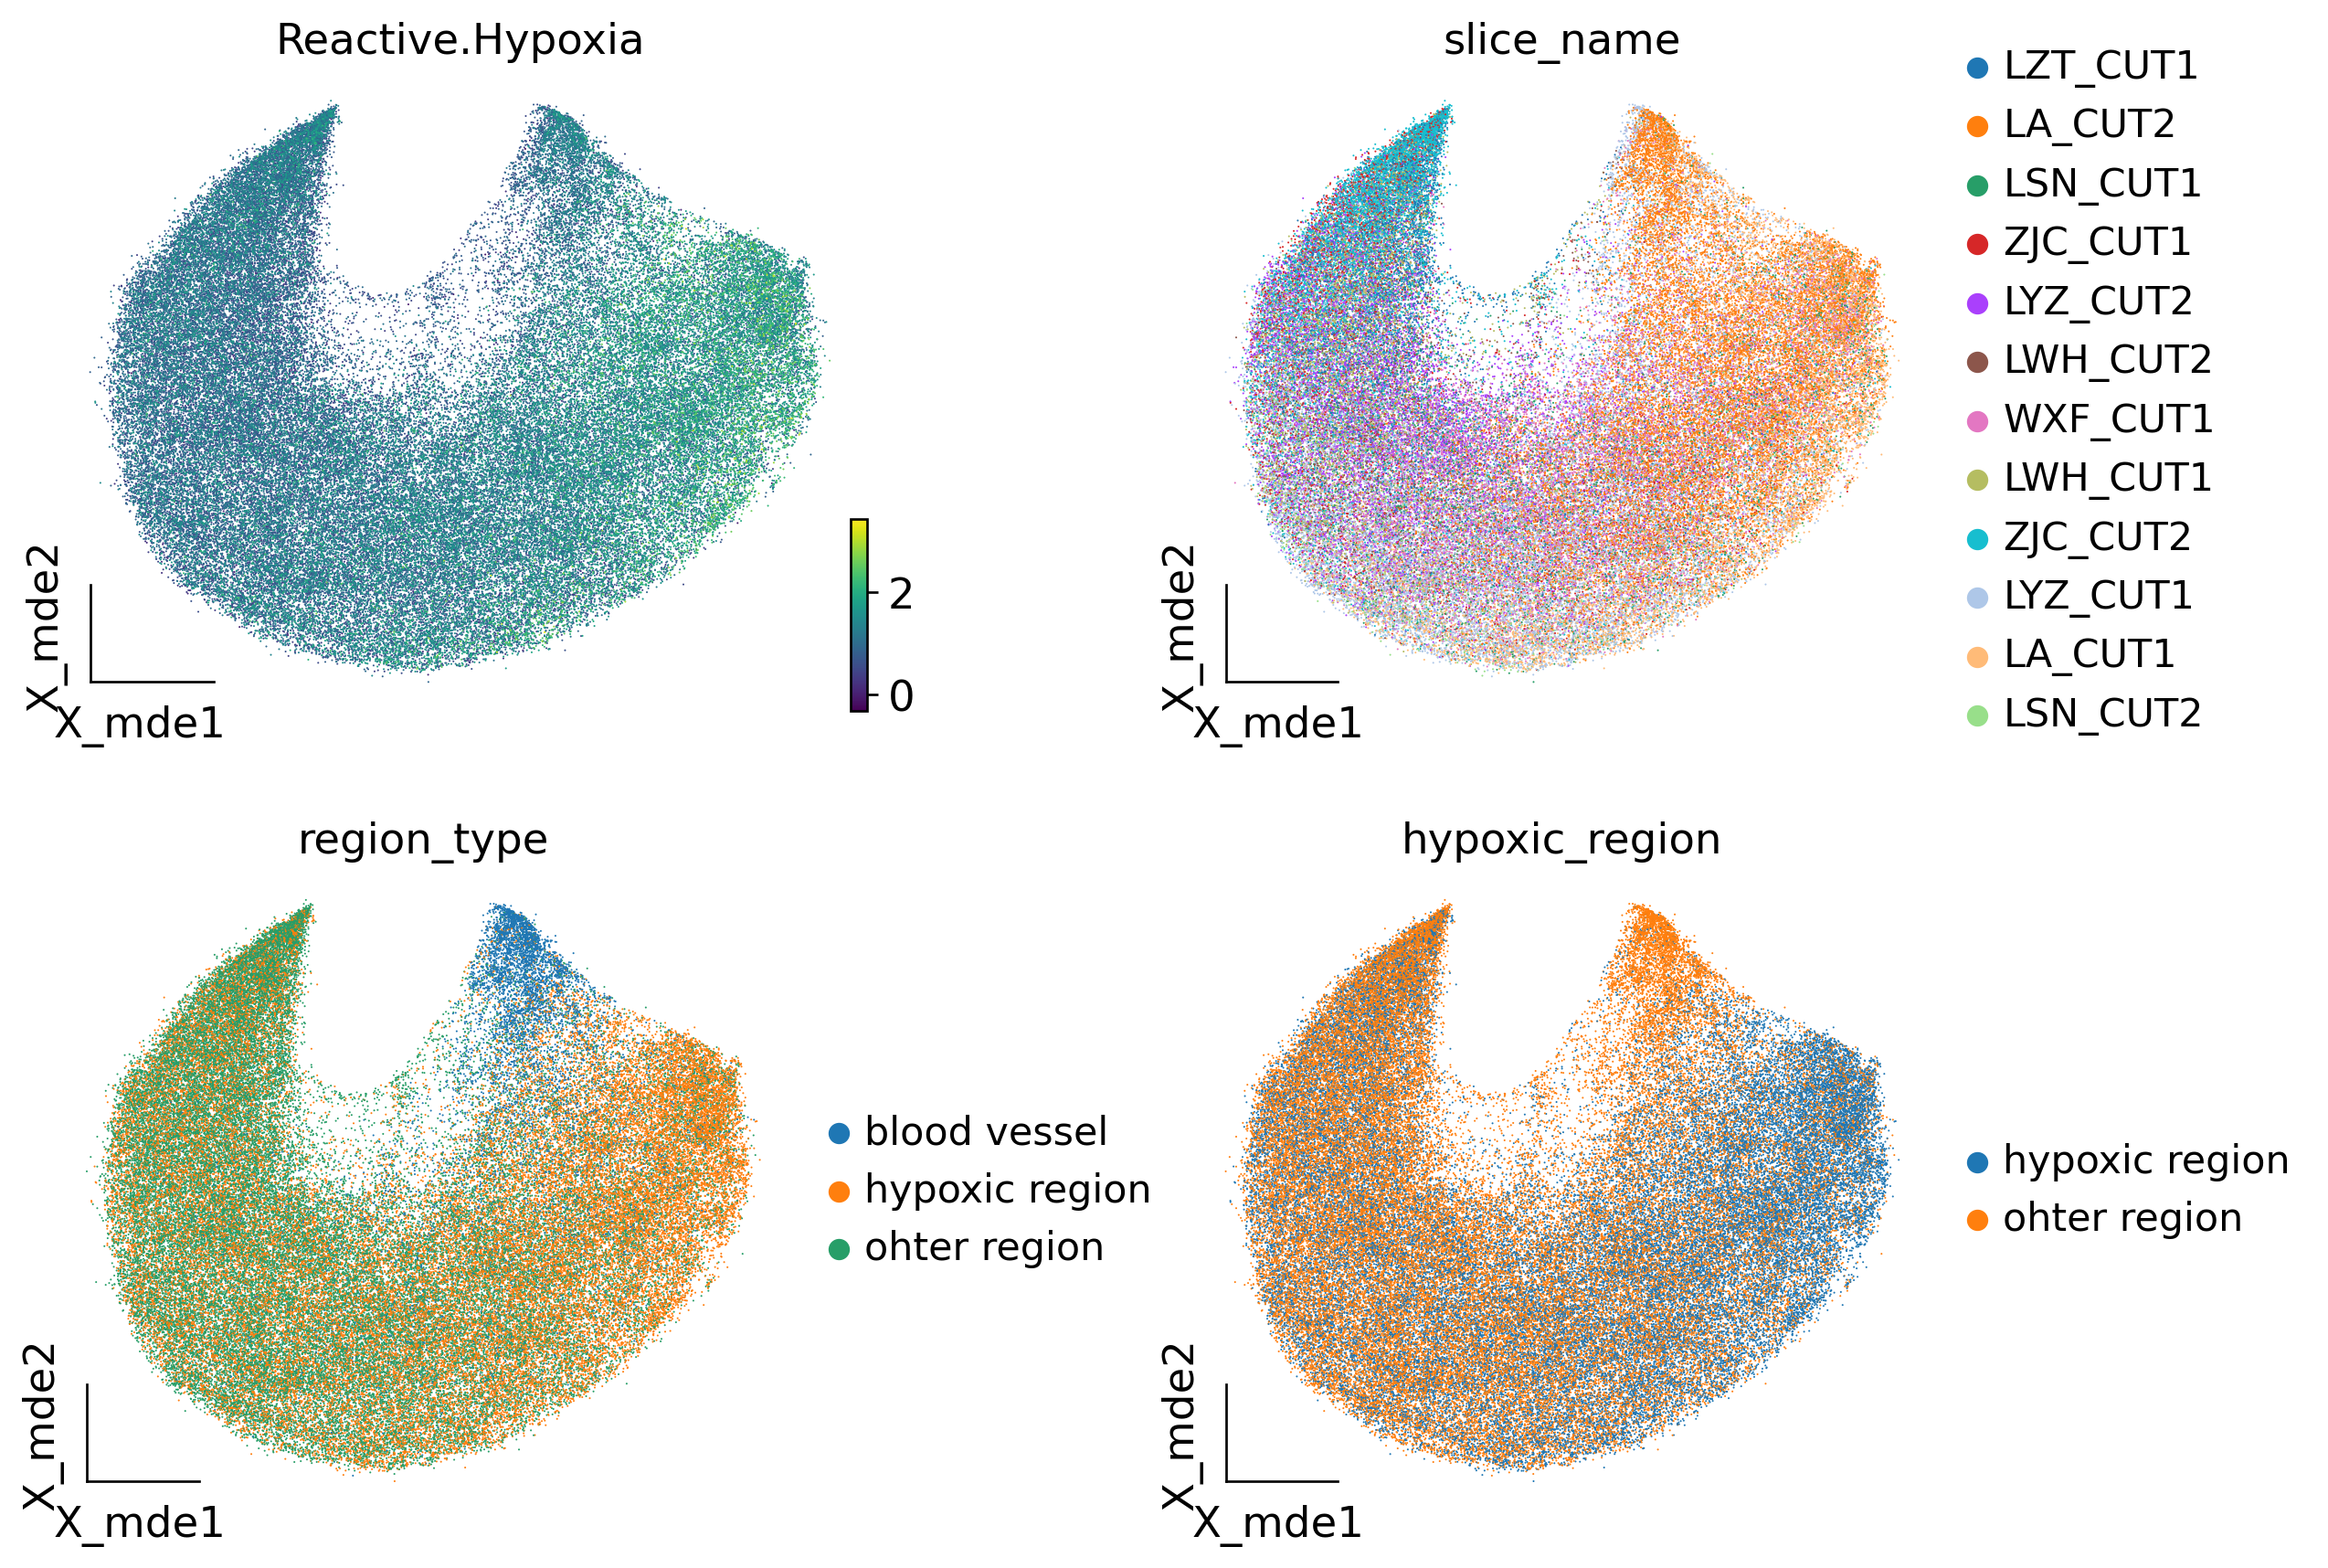

In [276]:
ov.utils.embedding(adata_concat,
                basis='X_mde',
                color=['Reactive.Hypoxia','slice_name','region_type', 'hypoxic_region'],
                frameon='small',size=1.5,ncols=2,wspace=0.4)

In [277]:
adata_concat.obs['hypoxic_region']

86543591021850_LA       ohter region
98569499449500_LYZ      ohter region
68504728389850_LYZ      ohter region
42734924602250_ZJC    hypoxic region
51324859193850_ZJC      ohter region
                           ...      
46170898439450_ZJC    hypoxic region
90409061588500_LA     hypoxic region
39298950765150_ZJC      ohter region
69578470212350_LYZ    hypoxic region
38439957314800_LA       ohter region
Name: hypoxic_region, Length: 101944, dtype: category
Categories (2, object): ['hypoxic region', 'ohter region']

In [278]:
adata_concat.write_h5ad('/storage/zengjianyangLab/hulei/GBM/Experiment/2024-2-5-hypoxic_region_deg_result/cut_concat.h5ad',compression="gzip")
adata_concat

AnnData object with n_obs × n_vars = 101944 × 26725
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'x', 'y', 'nCount_SCT', 'nFeature_SCT', 'first_type', 'batch_name', 'Reactive.Hypoxia', 'leiden', 'Anti.inflammatory.Macrophage', 'B', 'Cancer.cell', 'DC', 'Disease.Asscociated.Microglia', 'Endothelial', 'Homeostatic.Microglia', 'Hypoxic.Macrophage', 'Mast', 'Monocyte', 'Mural.cell', 'Neutrophil', 'NK', 'oligodendrocyte', 'pre.active.Microglia', 'T', 'region_type', 'hypoxic_region', 'slice_name'
    uns: 'slice_name_colors', 'region_type_colors', 'hypoxic_region_colors'
    obsm: 'X_pca', 'spatial', 'STAligner', 'X_mde'

loading adata:AnnData object with n_obs × n_vars = 101944 × 13472
    obs: 'nCount_RNA', 'nFeature_RNA', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mito', 'x', 'y', 'nCount_SCT', 'nFeature_SCT', 'first_type', 'slice_name', 'batch_name', 'Reactive.Hypoxia', 'leiden', 'Anti.inflammatory.Macrophage', 'B', 'Cancer.cell', 'DC', 'Disease.Asscociated.Microglia', 'Endothelial', 'Homeostatic.Microglia', 'Hypoxic.Macrophage', 'Mast', 'Monocyte', 'Mural.cell', 'Neutrophil', 'NK', 'oligodendrocyte', 'pre.active.Microglia', 'T', 'region_type', 'hypoxic_region'
    var: 'n_cells'
    uns: 'slice_name_colors', 'region_type_colors', 'hypoxic_region_colors', 'log1p'
    obsm: 'X_pca', 'spatial', 'STAligner', 'X_mde'
finish preprocess
... Fold change threshold: 0.35562282096888786


<AxesSubplot: title={'center': 'GO enrichment of upregulated\ngenes in hypoxic region'}, xlabel='Fractions of genes'>

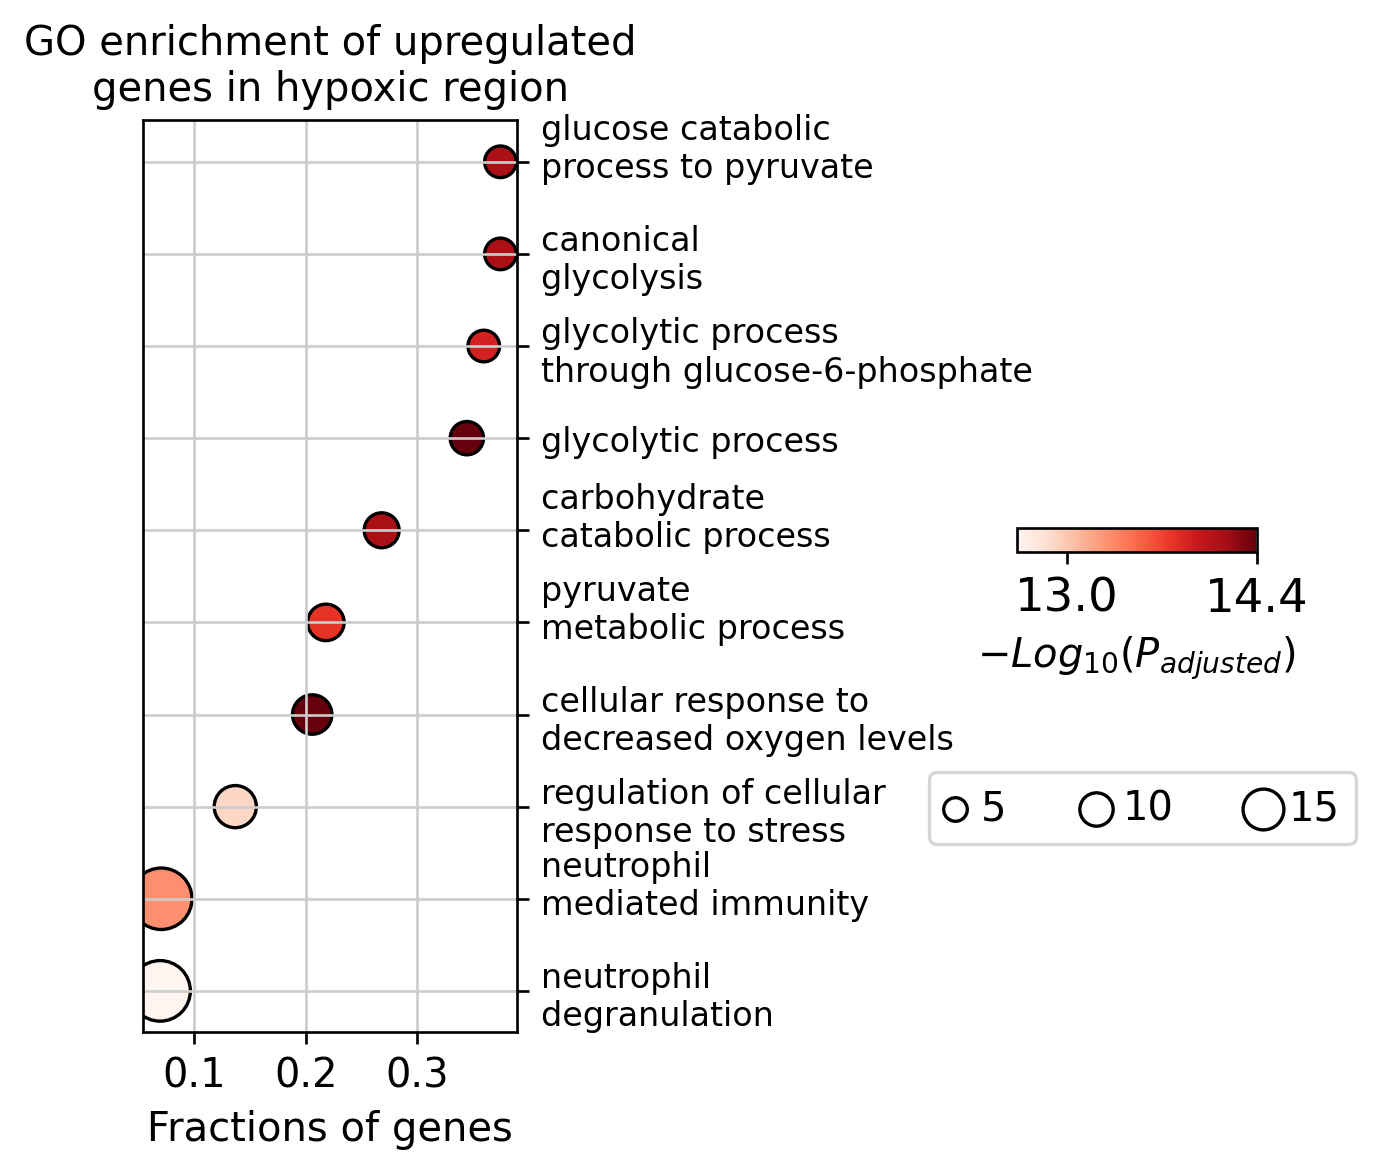

In [259]:
LSN_raw = adata_concat.copy()
sc.pp.filter_genes(LSN_raw, min_cells=round(len(LSN_raw.obs_names)*0.01)) # 过滤表达量<1%细胞的gene
sc.pp.normalize_total(LSN_raw, target_sum=1e4)
sc.pp.log1p(LSN_raw)


print(f'loading adata:{LSN_raw}')
# DEG Calculation
dds=ov.bulk.pyDEG(LSN_raw.to_df().T)
treatment_groups=LSN_raw[LSN_raw.obs['hypoxic_region']=='hypoxic region'].obs_names.tolist()
control_groups=LSN_raw[LSN_raw.obs['hypoxic_region']!='hypoxic region'].obs_names.tolist()
#sc.pp.scale(LSN_raw)

print('finish preprocess')
result=dds.deg_analysis(treatment_groups,control_groups,method='wilcox')
# -1 means automatically calculates
dds.foldchange_set(fc_threshold=-1,
                   pval_threshold=0.05,
                   logp_max=100)

# plot
pathway_dict=ov.utils.geneset_prepare('/storage/zengjianyangLab/hulei/GBM/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
deg_genes = dds.result.loc[(dds.result['sig']!='normal')&(dds.result['log2FC']>0.1)].index.tolist() #只富集高表达的基因
deg_genes_LSN = deg_genes
enr=ov.bulk.geneset_enrichment(gene_list=deg_genes,
                                pathways_dict=pathway_dict,
                                pvalue_type='auto',
                                organism='Human')
ov.bulk.geneset_plot(enr,figsize=(2,5),fig_title='GO enrichment of upregulated\ngenes in hypoxic region',custom_ticks=[13,14.4],
                        cmap='Reds')

In [260]:
enr.sort_values(['Adjusted P-value'],ascending=True).to_csv('/storage/zengjianyangLab/hulei/GBM/Experiment/2024-2-5-hypoxic_region_deg_result/upregulated_pathways.csv')
enr.sort_values(['Adjusted P-value'],ascending=True)

Gene_set                                               Term  \
301   CUSTOM23257336604800  cellular response to decreased oxygen levels (...   
580   CUSTOM23257336604800                    glycolytic process (GO:0006096)   
221   CUSTOM23257336604800                  canonical glycolysis (GO:0061621)   
222   CUSTOM23257336604800        carbohydrate catabolic process (GO:0016052)   
566   CUSTOM23257336604800  glucose catabolic process to pyruvate (GO:0061...   
...                    ...                                                ...   
2220  CUSTOM23257336604800  regulation of innate immune response (GO:0045088)   
943   CUSTOM23257336604800  negative regulation of endothelial cell apopto...   
578   CUSTOM23257336604800            glycogen metabolic process (GO:0005977)   
2145  CUSTOM23257336604800  regulation of epidermal growth factor-activate...   
203   CUSTOM23257336604800  branching morphogenesis of an epithelial tube ...   

     Overlap       P-value  Adjusted P-value  Odds Ratio  \
301    14/68  2.776436e-10      5.594027e-07    9.689477   
580    10/29  4.055112e-10      5.594027e-07   16.170038   
221     9/24  1.306325e-09      7.208299e-07   17.578385   
222    11/41  1.121769e-09      7.208299e-07   12.611255   
566     9/24  1.306325e-09      7.208299e-07   17.578385   
...      ...           ...               ...         ...   
2220    6/63  2.870838e-03      4.800389e-02    4.598062   
943     4/27  2.932273e-03      4.815560e-02    7.329714   
578     4/27  2.932273e-03      4.815560e-02    7.329714   
2145    4/27  2.932273e-03      4.815560e-02    7.329714   
203     5/44  2.959602e-03      4.831681e-02    5.544287   

                                                  Genes       logp      logc  \
301   HILPDA;ADAM8;PTGS2;NDRG1;BNIP3;FAM162A;MDM4;VE...  14.396396  2.271040   
580   PGAM1;PGM1;TPI1;ENO1;HK2;ALDOA;LDHA;ENO2;GPI;PGK1  14.396396  2.783160   
221        PFKP;PGAM1;TPI1;ENO1;HK2;ALDOA;ENO2;GPI;PGK1  14.142863  2.866670   
222   NEU1;PGAM1;PGM1;TPI1;ENO1;HK2;ALDOA;LDHA;ENO2;...  14.142863  2.534590   
566        PFKP;PGAM1;TPI1;ENO1;HK2;ALDOA;ENO2;GPI;PGK1  14.142863  2.866670   
...                                                 ...        ...       ...   
2220            TNFAIP3;ADAM8;FCGR2B;LYAR;BIRC3;SLC15A4   3.036473  1.525635   
943                         SCG2;ICAM1;SERPINE1;TNFAIP3   3.033318  1.991937   
578                                 PGM1;GBE1;PYGL;GYS1   3.033318  1.991937   
2145                           ERRFI1;TGFA;GPRC5A;HBEGF   3.033318  1.991937   
203                         CITED1;VEGFA;MYC;MET;SEMA3E   3.029976  1.712768   

      num  fraction  
301    14  0.205882  
580    10  0.344828  
221     9  0.375000  
222    11  0.268293  
566     9  0.375000  
...   ...       ...  
2220    6  0.095238  
943     4  0.148148  
578     4  0.148148  
2145    4  0.148148  
203     5  0.113636  

[169 rows x 11 columns]

<AxesSubplot: title={'center': 'GO enrichment of downregulated\ngenes in hypoxic region'}, xlabel='Fractions of genes'>

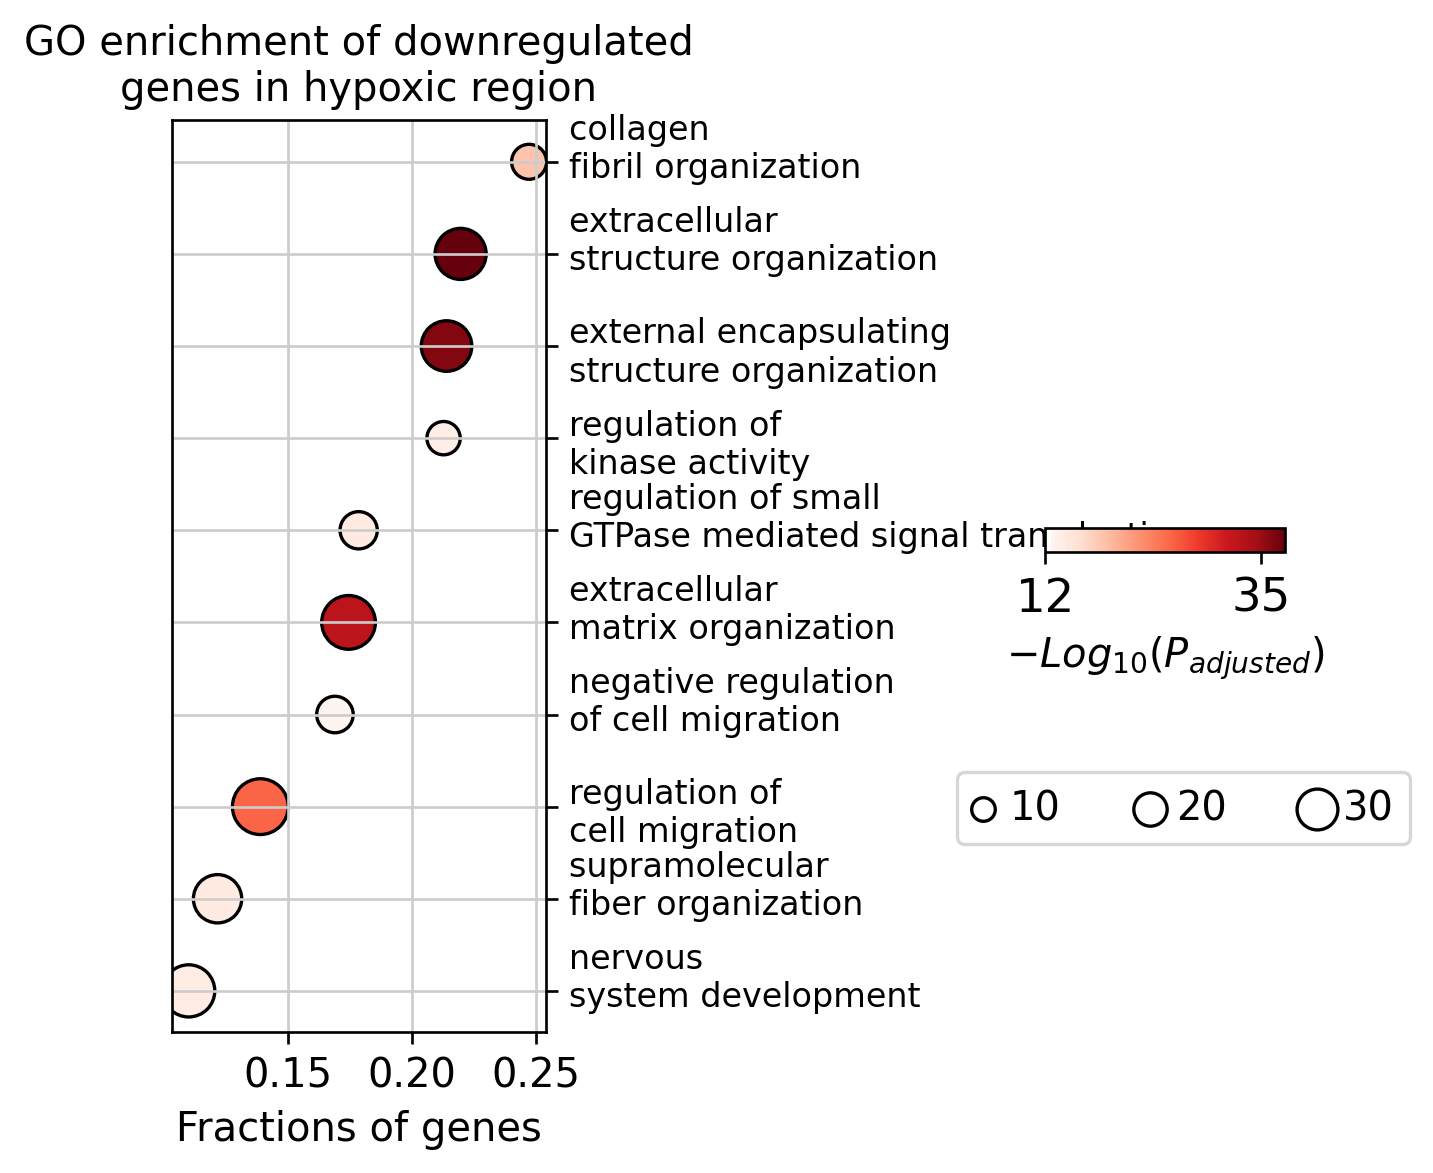

In [261]:
# plot
pathway_dict=ov.utils.geneset_prepare('/storage/zengjianyangLab/hulei/GBM/Reference/genesets/GO_Biological_Process_2021.txt',organism='Human')
deg_genes = dds.result.loc[(dds.result['sig']!='normal')&(dds.result['log2FC']<-0.1)].index.tolist() #只富集高表达的基因
deg_genes_LSN = deg_genes
enr=ov.bulk.geneset_enrichment(gene_list=deg_genes,
                                pathways_dict=pathway_dict,
                                pvalue_type='auto',
                                organism='Human')
ov.bulk.geneset_plot(enr,figsize=(2,5),fig_title='GO enrichment of downregulated\ngenes in hypoxic region',custom_ticks=[12,35],node_size=[10,20,30],node_diameter=5,
                        cmap='Reds')

In [262]:
enr.sort_values(['Adjusted P-value'],ascending=True).to_csv('/storage/zengjianyangLab/hulei/GBM/Experiment/2024-2-5-hypoxic_region_deg_result/downregulated_pathways.csv')
enr.sort_values(['Adjusted P-value'],ascending=True)

Gene_set                                               Term  \
687   CUSTOM23221022702656  extracellular structure organization (GO:0043062)   
682   CUSTOM23221022702656  external encapsulating structure organization ...   
686   CUSTOM23221022702656     extracellular matrix organization (GO:0030198)   
2566  CUSTOM23221022702656          regulation of cell migration (GO:0030334)   
520   CUSTOM23221022702656          collagen fibril organization (GO:0030199)   
...                    ...                                                ...   
3308  CUSTOM23221022702656  sympathetic nervous system development (GO:004...   
705   CUSTOM23221022702656                   filopodium assembly (GO:0046847)   
2789  CUSTOM23221022702656    regulation of leukocyte activation (GO:0002694)   
1699  CUSTOM23221022702656  platelet-derived growth factor receptor signal...   
2909  CUSTOM23221022702656  regulation of osteoblast proliferation (GO:003...   

     Overlap       P-value  Adjusted P-value  Odds Ratio  \
687   47/214  1.380414e-20      4.711354e-17    5.355504   
682   46/215  1.097903e-19      1.873572e-16    5.211457   
686   52/298  5.669681e-18      6.450207e-15    4.261920   
2566  56/403  1.020901e-14      8.710834e-12    3.391620   
520    22/89  1.987601e-11      1.356736e-08    5.929801   
...      ...           ...               ...         ...   
3308    4/16  4.194140e-03      4.970348e-02    6.316218   
705     4/16  4.194140e-03      4.970348e-02    6.316218   
2789    4/16  4.194140e-03      4.970348e-02    6.316218   
1699    4/16  4.194140e-03      4.970348e-02    6.316218   
2909    4/16  4.194140e-03      4.970348e-02    6.316218   

                                                  Genes       logp      logc  \
687   BCAN;FBLN5;ELN;NID2;COL6A3;COL14A1;COL8A1;BGN;...  37.593971  1.678125   
682   BCAN;FBLN5;ELN;NID2;COL6A3;COL14A1;COL8A1;BGN;...  36.213515  1.650859   
686   BCAN;A2M;FBLN5;ELN;NID2;COL6A3;COL14A1;COL8A1;...  32.674664  1.449720   
2566  LDB2;SRGAP3;PIK3R3;ACVRL1;PDGFRB;CDH13;SEMA3F;...  25.466454  1.221308   
520   COL6A3;COL14A1;COL8A1;COL12A1;LUM;COL9A3;COL1A...  18.115599  1.779991   
...                                                 ...        ...       ...   
3308                            ASCL1;SOX11;SOX4;SEMA3F   3.001680  1.843121   
705                            DNM3;FGD4;ARHGEF4;SRGAP2   3.001680  1.843121   
2789                           CD200;CD74;LILRB4;MYO18A   3.001680  1.843121   
1699                            PDGFB;PDGFRB;PTPRJ;PLAT   3.001680  1.843121   
2909                            TMEM119;PLXNB1;LTF;SOX8   3.001680  1.843121   

      num  fraction  
687    47  0.219626  
682    46  0.213953  
686    52  0.174497  
2566   56  0.138958  
520    22  0.247191  
...   ...       ...  
3308    4  0.250000  
705     4  0.250000  
2789    4  0.250000  
1699    4  0.250000  
2909    4  0.250000  

[288 rows x 11 columns]

(<Figure size 960x960 with 1 Axes>,
 <AxesSubplot: title={'center': 'DEG Analysis'}, xlabel='$log_{2}FC$', ylabel='$-log_{10}(qvalue)$'>)

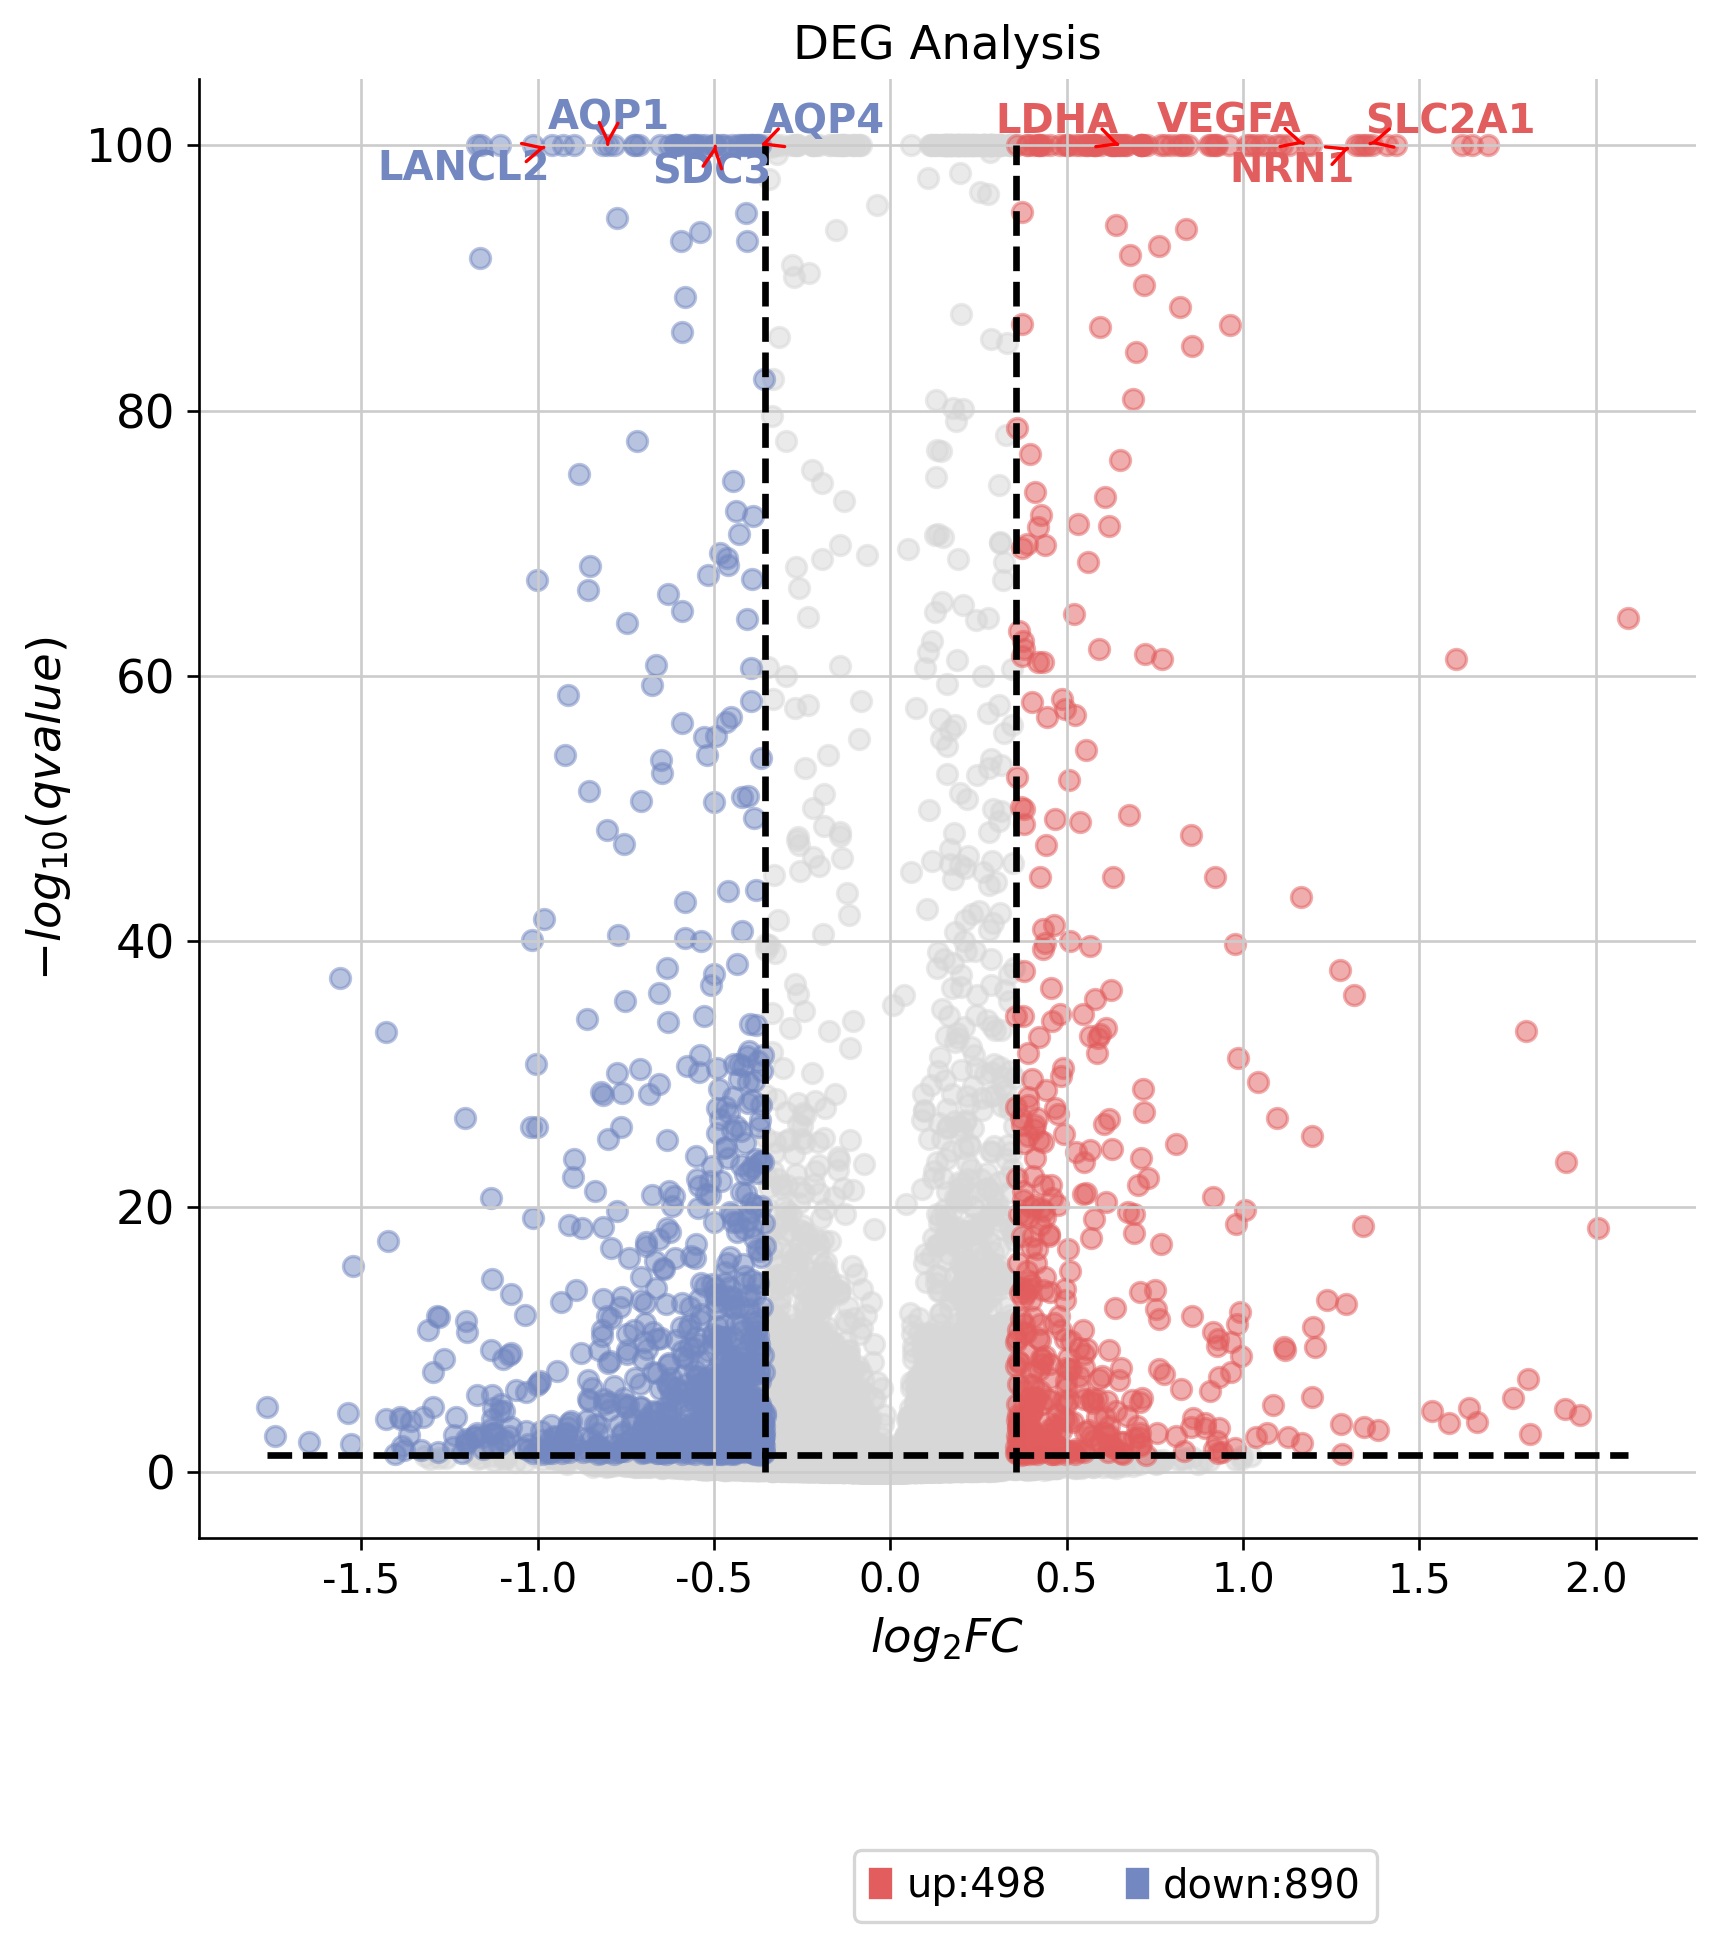

In [263]:
dds.plot_volcano(title='DEG Analysis',figsize=(8,8),
                 plot_genes_num=8,plot_genes_fontsize=12,)

In [264]:
dds.result[(dds.result['sig']!='normal')&(dds.result['log2FC']>0.1)].sort_values(['FoldChange'],ascending=False).to_csv('/storage/zengjianyangLab/hulei/GBM/Experiment/2024-2-5-hypoxic_region_deg_result/upregulated_genes.csv')
dds.result[(dds.result['sig']!='normal')&(dds.result['log2FC']>0.1)].sort_values(['FoldChange'],ascending=False)

pvalue        qvalue  FoldChange  -log(pvalue)  -log(qvalue)  \
CXCL8   1.051559e-66  4.070864e-65    4.266537     65.978166     64.390313   
CXCL3   2.871666e-20  4.317755e-19    4.019787     19.541866     18.364742   
MT1H    8.091333e-06  4.910200e-05    3.878310      5.091980      4.308901   
HSPA6   2.529513e-25  4.580323e-24    3.775291     24.596963     23.339104   
KRT75   2.979209e-06  1.907600e-05    3.766800      5.525899      4.719513   
...              ...           ...         ...           ...           ...   
TARS1   1.096352e-09  9.659943e-09    1.281521      8.960050      8.015025   
EIF3E   1.824021e-36  4.500589e-35    1.280562     35.738970     34.346731   
SEMA3E  1.604648e-11  1.595410e-10    1.280444     10.794620      9.797128   
RSL1D1  1.508014e-29  3.135180e-28    1.280198     28.821595     27.503738   
GCC1    1.213026e-02  3.985825e-02    1.279967      1.916130      1.399482   

        BaseMean  log2(BaseMean)    log2FC  abs(log2FC)      size sig  
CXCL8   0.110061       -3.183629  2.093066     2.093066  0.426654  up  
CXCL3   0.053549       -4.223007  2.007119     2.007119  0.401979  up  
MT1H    0.027403       -5.189548  1.955428     1.955428  0.387831  up  
HSPA6   0.065240       -3.938089  1.916588     1.916588  0.377529  up  
KRT75   0.026054       -5.262369  1.913339     1.913339  0.376680  up  
...          ...             ...       ...          ...       ...  ..  
TARS1   0.172043       -2.539160  0.357857     0.357857  0.128152  up  
EIF3E   0.384712       -1.378149  0.356778     0.356778  0.128056  up  
SEMA3E  0.185063       -2.433911  0.356644     0.356644  0.128044  up  
RSL1D1  0.337759       -1.565935  0.356367     0.356367  0.128020  up  
GCC1    0.066646       -3.907344  0.356106     0.356106  0.127997  up  

[498 rows x 11 columns]

In [265]:
dds.result[(dds.result['sig']!='normal')&(dds.result['log2FC']<-0.1)].sort_values(['FoldChange'],ascending=True).to_csv('/storage/zengjianyangLab/hulei/GBM/Experiment/2024-2-5-hypoxic_region_deg_result/downregulated_genes.csv')
dds.result[(dds.result['sig']!='normal')&(dds.result['log2FC']<-0.1)].sort_values(['FoldChange'],ascending=True)

pvalue        qvalue  FoldChange  -log(pvalue)  -log(qvalue)  \
SFRP2    2.155217e-06  1.401307e-05    0.293632      5.666509      4.853467   
TINAGL1  4.300169e-04  2.012222e-03    0.298582      3.366514      2.696324   
CARMN    1.438811e-03  6.031010e-03    0.318798      2.841996      2.219610   
CX3CR1   2.406107e-39  6.233669e-38    0.338843     38.618685     37.205256   
SEMA3F   5.603269e-06  3.453213e-05    0.344135      5.251559      4.461777   
...               ...           ...         ...           ...           ...   
NUP210   3.140433e-03  1.212929e-02    0.780369      2.503011      1.916165   
NRXN2    4.010591e-04  1.891831e-03    0.780883      3.396792      2.723118   
TCF7L2   1.094022e-05  6.544702e-05    0.780990      4.960974      4.184110   
FBXL17   6.168557e-19  8.701863e-18    0.781235     18.209816     17.060388   
BCR      5.786827e-06  3.561450e-05    0.781368      5.237559      4.448373   

         BaseMean  log2(BaseMean)    log2FC  abs(log2FC)      size   sig  
SFRP2    0.035215       -4.827660 -1.767918     1.767918  0.029363  down  
TINAGL1  0.023268       -5.425506 -1.743801     1.743801  0.029858  down  
CARMN    0.022758       -5.457457 -1.649286     1.649286  0.031880  down  
CX3CR1   0.099515       -3.328948 -1.561310     1.561310  0.033884  down  
SEMA3F   0.032371       -4.949144 -1.538955     1.538955  0.034413  down  
...           ...             ...       ...          ...       ...   ...  
NUP210   0.085962       -3.540153 -0.357771     0.357771  0.078037  down  
NRXN2    0.115849       -3.109679 -0.356821     0.356821  0.078088  down  
TCF7L2   0.135459       -2.884075 -0.356623     0.356623  0.078099  down  
FBXL17   0.269253       -1.892965 -0.356171     0.356171  0.078124  down  
BCR      0.135240       -2.886407 -0.355926     0.355926  0.078137  down  

[890 rows x 11 columns]